<a href="https://colab.research.google.com/github/lavendermistyco/neurosynca/blob/master/Test_Centers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generating Test Data To Train the Model to use for NeuroSynca demo.

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
# Install the necessary libraries
!pip install pandas scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('test_centers_with_types_and_prices.csv')

# Check the dataset structure
df.head()


,state,city,center_name,address,latitude,longitude,testing_type,price
0,Texas,Houston,Harris Health Ben Taub Hospital,"1504 Ben Taub Loop, Houston",29.710813,-95.394213,Autism,993.18
1,Texas,Houston,Methodist Debakey Heart Center,"6565 Fannin Street Suite 1901, Houston",29.710866,-95.399627,General Mental Health,446.01
2,Texas,Houston,Memorial Hermann Southeast Hospital,"11800 Astoria Boulevard, Houston",29.582575,-95.208062,ADHD,571.74
3,Texas,Houston,Houston Methodist Willowbrook Hospital,"18220 Texas 249, Houston",29.967293,-95.550763,Autism,809.12
4,Texas,Houston,UTHealth Houston Psychiatry,"1941 East Road, Houston",29.694481,-95.394039,Autism,858.30


# Data Preprocessing

In [5]:
# Convert categorical columns into numerical values using Label Encoding
label_encoder = LabelEncoder()

# Encode city, state, and testing_type
df['city_encoded'] = label_encoder.fit_transform(df['city'])
df['state_encoded'] = label_encoder.fit_transform(df['state'])
df['testing_type_encoded'] = label_encoder.fit_transform(df['testing_type'])

# Select features (inputs) and target (output)
X = df[['latitude', 'longitude', 'city_encoded', 'state_encoded', 'testing_type_encoded']]
y = df['price']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of training data
X_train.shape, X_test.shape


((368, 5), (92, 5))

# Training the Model

Random Forest Regressor chosen because it's great for predicting continuous vales like price.


In [6]:
# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 241.07366743676462


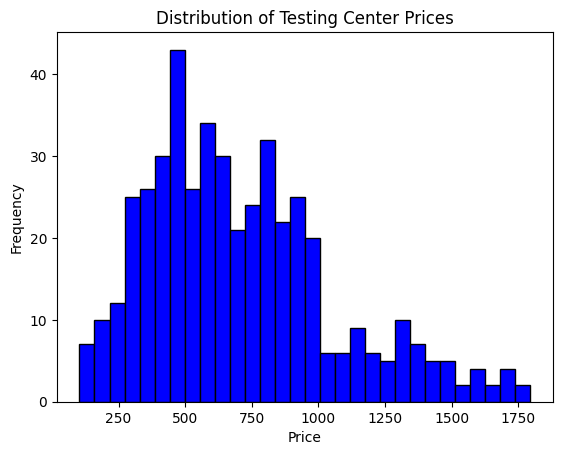

In [7]:
# Check the price distribution because the RSME is on the higher end.
import matplotlib.pyplot as plt

# Plot the distribution of the prices
plt.hist(df['price'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Testing Center Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Fine-Tuning the model with Hyperparameter Optimization

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best hyperparameters found:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best hyperparameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [9]:
# Retraining model with updated parameters
import numpy as np

best_rf_model = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=10,
    n_estimators=100,
    random_state=42
)

best_rf_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = best_rf_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error with best hyperparameters:", rmse)


Root Mean Squared Error with best hyperparameters: 209.8376849538482


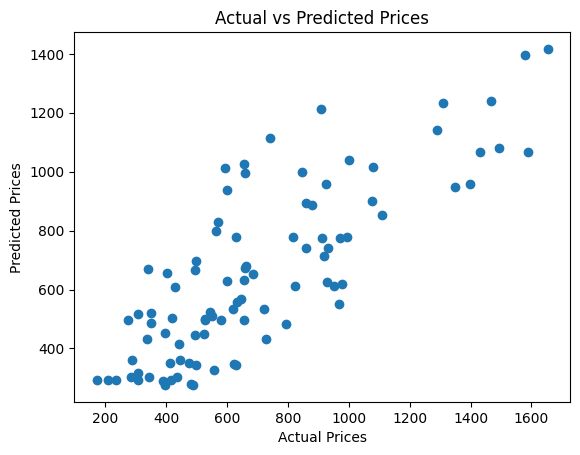

In [10]:
# plotting new results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


In [11]:
!pip install joblib

import joblib

model_name = 'model_weights.h5'
joblib.dump(best_rf_model, model_name)

['model_weights.h5']